In [1]:
from google.colab import files
uploaded= files.upload()
filename= list(uploaded.keys())[0]
filename

Saving slr12.csv to slr12.csv


'slr12.csv'

# Linear Regression
- 지도학습 머신 러닝 알고리즘

### Function 
- y = mx + b

  - y : predicted value
  - x : independent variable
  - m, b : coefficients  👈 *need to optimize in order to fit the regression line to our data*

#### How does it work?
+ coefficients(m,b)는 train과정에서 찾는다
  * train 과정에서 그려진 linear regression line 을 바탕으로 
+ test과정에서 y값을 예측! 
+ 예측된 y값과 실제 result 값을 비교해서 오차를 판단, 정확성 비교
___



# Linear Regression in Python
1. 필요 함수 생성
2. Coefficient, Linear Regression 구하기
3. Visualization
4. 결과값 평가하기

1. Mean, Covariance, Variance 함수 식 만들기

- $ variance = \frac{\sum_{i=1}^n{(x_i-\bar{x})^2}}{n}, (\bar{x}:평균) $
- $ covariance = \frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{n}, (\bar{x}:x의 평균, \bar{y}:y의 평균) $

In [3]:
# mean
def get_mean(arr):
  return np.sum(arr)/len(arr)

# variacne 
def get_variacne(arr, mean):
  return np.sum((arr-mean)**2)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
  final_arr = (arr_x - mean_x) *(arr_y - mean_y)
  return np.sum(final_arr)

2. Coefficients, Linear Regression 계산하기 
- 그래프에서 train 시키고 line 을 그리는 작업

In [64]:
# find_coeff
def get_coefficients(x,y):
  x_mean = get_mean(x)
  y_mean = get_mean(y)
  m = get_covariance(x, x_mean, y, y_mean)/get_variacne(x, x_mean)
  c = y_mean - x_mean*m
  return m, c

# Regression Fuction
def linear_regression(x_train, y_train, x_test, y_test):
  prediction = []
  # sckit-learn에서 fit (train)과정 
  m, c = get_coefficients(x_train, y_train)
  # 예측 
  for x in x_test:
    y = m*x + c
    prediction.append(y)

3. 모델의 정확성을 측정하는 방법
- r2_score
- mean_squared_error (MSE)
- root_mean_squared_error (RMSE)
-  mean_absolute_error

In [ ]:
# 평가, 판단하기 
mse = mean_squared_error(prediction, y_test)
print("The MSE score of the model is : ", mse)
return prediction

# There are 36 sample out of which 30 are for training and 6 are for testing 
linear_regression(x[:30], y[:30], x[30:], y[30:])

4. 시각화 
 - Matplotlib 과 seaborn을 이용해서 regression line 그리기

In [10]:
# Visualize
def plot_reg_line(x, y):
  prediction = []
  m,c = get_coefficients(x,y)
  for x0 in range(650, 1400):
    yhat = m*x0 + c
    prediction. append(yhat)
  

  fig = plt.figure(figsize=(20,7))     # Scatter plot 
  plt.subplot(1,2,1)
  sns.scatterplot(x=x, y=y)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Scatter Plot between X and Y')

  plt.subplot(1,2,2)                       # Scatter + line plot 
  sns.scatterplot(x=x, y=y, color = 'blue')
  sns.lineplot(x=[i for i in range(650,1400)], y= prediction, color ='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Regression Plot')
  plt.show()

 5. 시각화
- Seaborn의 Regplot 을 사용하면 scatter plot + line plot 을 한번에 구할 수 있음

In [ ]:
sns.regplot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()

# Linear Regression 이용해서 실제 데이터 평가하기
Dataset : Pizza Franchise Data

* X 열 : Annual Franchise Fee
* Y 열 : Start Up Cost 

Reference : Business Opportunity- Handbook

In [50]:
# Import necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error


# Read Data
df = pd.read_csv('slr12.csv')
x = df['AnnualFranchiseFee'].values
y = df['StartUpCost'].values

# mean
def get_mean(arr):
  return np.sum(arr)/len(arr)

# variacne 
def get_variacne(arr, mean):
  return np.sum((arr-mean)**2)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
  final_arr = (arr_x - mean_x) *(arr_y - mean_y)
  return np.sum(final_arr)

In [52]:
# find_coeff
def get_coefficients(x,y):
  x_mean = get_mean(x)
  y_mean = get_mean(y)
  m = get_covariance(x, x_mean, y, y_mean)/get_variacne(x, x_mean)
  c = y_mean - x_mean*m
  return m, c

# Regression Fuction
def linear_regression(x_train, y_train, x_test, y_test):
  prediction = []
  m, c = get_coefficients(x_train, y_train)
  for x in x_test:
    y = m*x + c
    prediction.append(y)

# 평가, 판단하기 
  mse = mean_squared_error(prediction, y_test)
  print("The MSE score of the model is : ", mse)
  return prediction

# There are 36 sample out of which 30 are for training and 6 are for testing 
linear_regression(x[:30], y[:30], x[30:], y[30:])


The MSE score of the model is :  97482.15509744169


[863.2891581051077,
 1237.6414070056592,
 813.3755249183675,
 1013.0300576653283,
 1013.0300576653283,
 963.1164244785881]

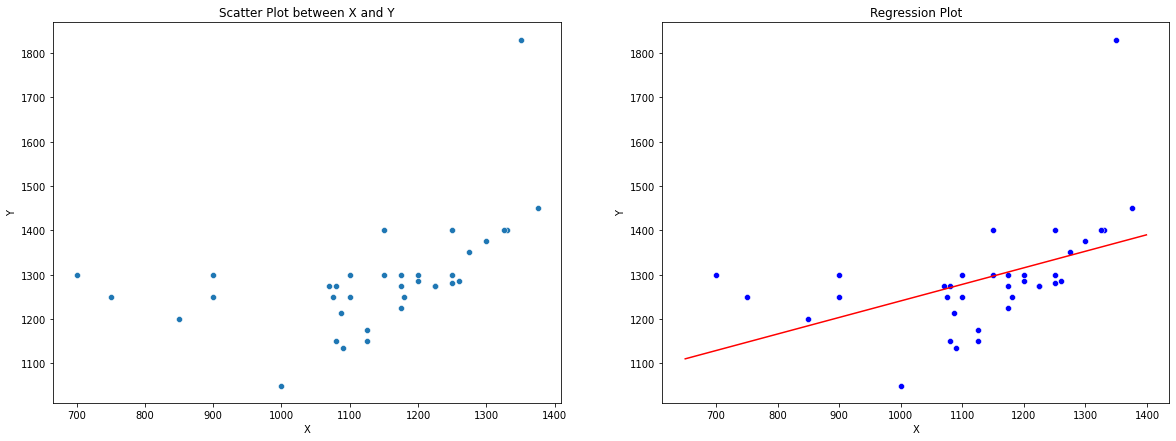

In [56]:
# Visualize
def plot_reg_line(x, y):
  prediction = []
  m,c = get_coefficients(x,y)
  for x0 in range(650, 1400):
    yhat = m*x0 + c
    prediction. append(yhat)
  

  fig = plt.figure(figsize=(20,7))     # Scatter plot 
  plt.subplot(1,2,1)
  sns.scatterplot(x=x, y=y)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Scatter Plot between X and Y')

  plt.subplot(1,2,2)                       # Scatter + line plot 
  sns.scatterplot(x=x, y=y, color = 'blue')
  sns.lineplot(x=[i for i in range(650,1400)], y= prediction, color ='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Regression Plot')
  plt.show()

plot_reg_line(x, y)

### 정확하게 linear regression을 만들었는지 확인하기 
- scikit learn의 LinearRegression 사용

In [57]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x[:30].reshape(-1,1), y[:30])
prediction = reg.predict(x[30:].reshape(-1,1))
mse = mean_squared_error(prediction, y[30:])

print('The MSE score of the model is: ', mse)

The MSE score of the model is:  97482.15509744169


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


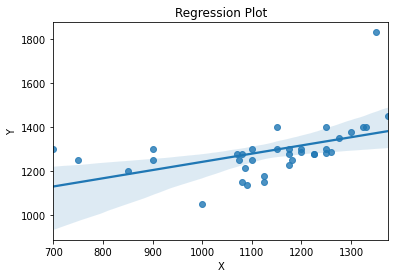

In [61]:
sns.regplot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()

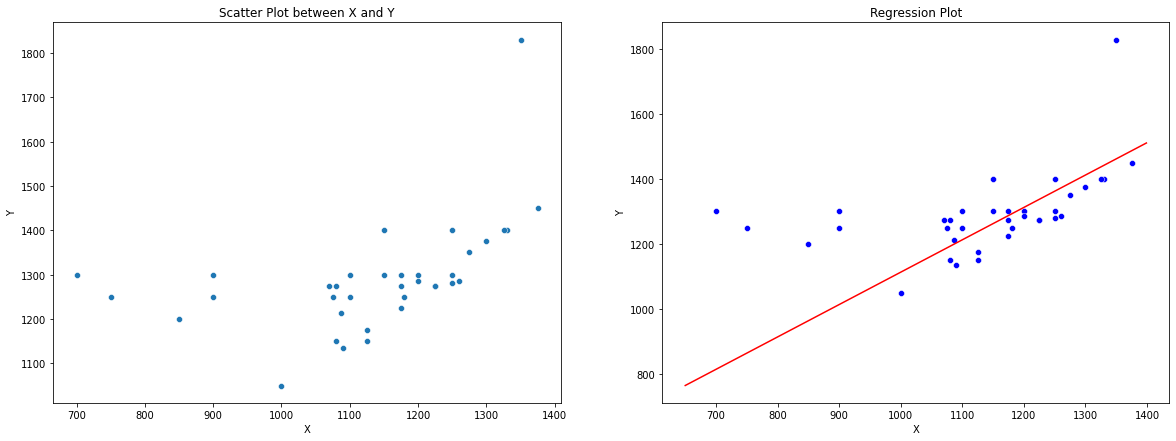

In [63]:
prediction = reg.predict(np.array([i for i in range(650, 1400)]).reshape(-1,1))

fig = plt.figure(figsize=(20,7))     # Scatter plot 
plt.subplot(1,2,1)
sns.scatterplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot between X and Y')

plt.subplot(1,2,2)                       # Scatter + line plot 
sns.scatterplot(x=x, y=y, color = 'blue')
sns.lineplot(x=[i for i in range(650,1400)], y= prediction, color ='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()